In [1]:
# Before starting to import the libraries, I installed some of them directly to the Python environment using command prompt
# I'm using this code to ensure that the installations were successful 
get_ipython().system('pip install plotly')
get_ipython().system('pip install Scipy')

     |████████████████████████████████| 15.6 MB 5.1 MB/s            


In [ ]:
#Preparing data

In [3]:
# we will start by importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from scipy import optimize
from scipy import interpolate
from scipy import signal
from IPython import display 
get_ipython().run_line_magic('matplotlib', 'inline')


In [4]:
#Read the dataset 'Obesity levels Data.csv' into a pandas DataFrame called df 
# Display the first few rows of the dataset to ensure the data structure and its content 
df = pd.read_csv('Obesity levels Data.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Assess the dataset 

In [4]:
# Count the number of rows and columns 
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 2111
Number of columns: 17


In [5]:
# Here to retrieve data columns in the dataset
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
# Here to look at the rows of th dataset
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
# Retrieve the data types of each column in the dataset
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
# info about datatypes and nulls # it seems that there are no missing values :) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [9]:
#Here we see in the "Age" column, the mean age is aprroximately 24 years, and the minimum age observed is 14 years, and the maximum age is 61 years
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
sum(df.duplicated())

24

In [11]:
# Check coloumns that contain duplicated values and print the columns names 
duplicated_columns = df.columns[df.apply(lambda x: x.duplicated()).any()]

# Print the columns with duplicated values
print("Columns with duplicated values:", list(duplicated_columns))


Columns with duplicated values: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [12]:
# Count the number of duplicated values in the 'Age' column
df.duplicated(subset=['Age']).sum()

709

In [13]:
df.Age.value_counts()

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
19.314964      1
21.900120      1
23.421726      1
18.312665      1
61.000000      1
Name: Age, Length: 1402, dtype: int64

In [14]:
#Cleaning the data #qualit: there are columns with duplicated values 'age, gender'

In [15]:
# We will make a copy of the dataset, in case we want to go back to the original one
df_cleaned = df.copy()

In [16]:
# Identify duplicated rows based on the 'Age' attribute
duplicate_age_rows = df[df.duplicated(subset=['Age'], keep='first')]

# Print the duplicated rows for inspection
print("Duplicated rows based on 'Age':")
print(duplicate_age_rows)

Duplicated rows based on 'Age':
       Age  Gender    Height      Weight       CALC FAVC  FCVC  NCP  SCC  \
1     21.0  Female  1.520000   56.000000  Sometimes   no   3.0  3.0  yes   
6     23.0  Female  1.500000   55.000000  Sometimes  yes   3.0  3.0   no   
7     22.0    Male  1.640000   53.000000  Sometimes   no   2.0  3.0   no   
9     22.0    Male  1.720000   68.000000         no  yes   2.0  3.0   no   
11    21.0  Female  1.720000   80.000000  Sometimes  yes   2.0  3.0  yes   
...    ...     ...       ...         ...        ...  ...   ...  ...  ...   
2090  26.0  Female  1.643421  111.939983  Sometimes  yes   3.0  3.0   no   
2091  26.0  Female  1.640535  111.555967  Sometimes  yes   3.0  3.0   no   
2092  26.0  Female  1.626483  111.357062  Sometimes  yes   3.0  3.0   no   
2093  26.0  Female  1.645990  111.922491  Sometimes  yes   3.0  3.0   no   
2094  26.0  Female  1.643892  111.884535  Sometimes  yes   3.0  3.0   no   

     SMOKE      CH2O family_history_with_overweight  FA

In [ ]:
#Cleaning process ##quality issue: As we see above have floating-point in Values of Age, so we normalize the values

In [18]:
df['Age'].round().astype(int)

# Print the first few rows to verify the transformation
print(df.head())

# Optionally, save the modified DataFrame to a new CSV file
df.to_csv('normalized_dataset.csv', index=False)

   Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0   21  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1   21  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2   23    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3   27    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4   22    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Wei

In [ ]:
#Exploratory Data Analysis: Analyse and Visualise

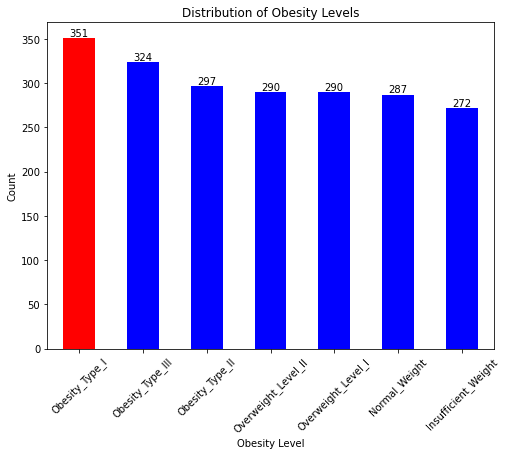

In [19]:
#I'm first interested in show the overall Obesity levels ditribution 

obesity_level_counts = df['NObeyesdad'].value_counts()

# Find the tallest bar 
max_count_index = obesity_level_counts.idxmax()

# To customize colors of the bar
custom_colors = ['blue' if idx != max_count_index else 'red' for idx in obesity_level_counts.index]

plt.figure(figsize=(8, 6))
obesity_level_counts.plot(kind='bar', color=custom_colors)

# Show each bar with its corresponding value
for i, count in enumerate(obesity_level_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#As shown above that Class 2 of obesity level has shown the highest number, based on Google search class 2 of obesity means that IBM of 30 to<35 link:https://medlineplus.gov/ency/patientinstructions/000348.htm#:~:text=Overweight%20(not%20obese)%2C%20if,to%20or%20greater%20than%2040.0


In [ ]:
#What is the Obesity levels distribution over Age Groups?

<Figure size 864x576 with 0 Axes>

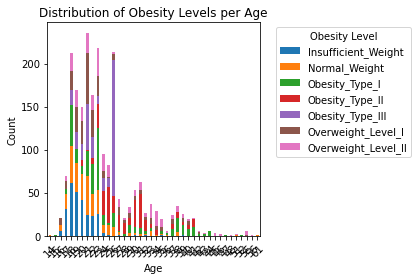

In [22]:
Age_obesity_counts = df.groupby(['Age', 'NObeyesdad']).size().unstack()

# Plot a stacked bar chart to visualize the distribution of obesity levels per age
plt.figure(figsize=(12, 8))
Age_obesity_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Obesity Levels per Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# The output above is not as expected, i think because we didn't pre-define the Age Groups first 

<Figure size 864x576 with 0 Axes>

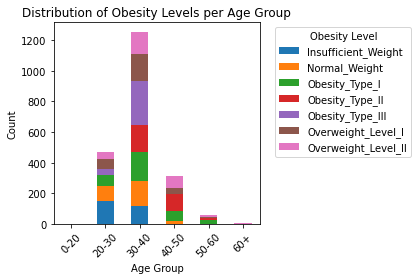

In [44]:
Age_bins = [0, 10, 20, 30, 40, 50, 60]
Age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize ages into age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=Age_bins, labels=Age_labels, right=False)

# Group the data by age group and obesity level, and calculate the count of each group
age_obesity_counts = df.groupby(['AgeGroup', 'NObeyesdad']).size().unstack()

# Plot a stacked bar chart to visualize the distribution of obesity levels per age group
plt.figure(figsize=(12, 8))
age_obesity_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Obesity Levels per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Above it doesn't show Age group (0-20) which means dropping huge number of values! especially the minimum value of Age column is 14 years old as shown in the preparing data phase

<Figure size 864x576 with 0 Axes>

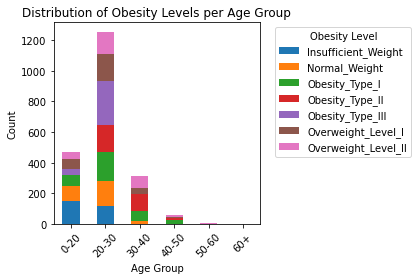

In [54]:
Age_bins =  [0, 20, 30, 40, 50, 60, 100]
Age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize ages into age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=Age_bins, labels=Age_labels, right=False)

# Group the data by age group and obesity level, and calculate the count of each group
Age_group_obesity_counts = df.groupby(['AgeGroup', 'NObeyesdad']).size().unstack()

# Show a stacked bar chart to visualize the distribution of obesity levels for each age group
plt.figure(figsize=(12, 8))
Age_group_obesity_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Obesity Levels per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


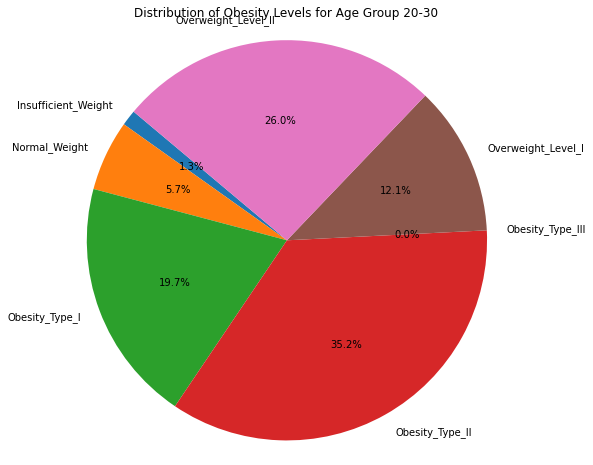

In [49]:
Age_group = '20-30'  
obesity_counts = Age_group_obesity_counts.loc[age_group].dropna()
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Obesity Levels for Age Group {Age_group}')
plt.axis('equal') 
plt.show()

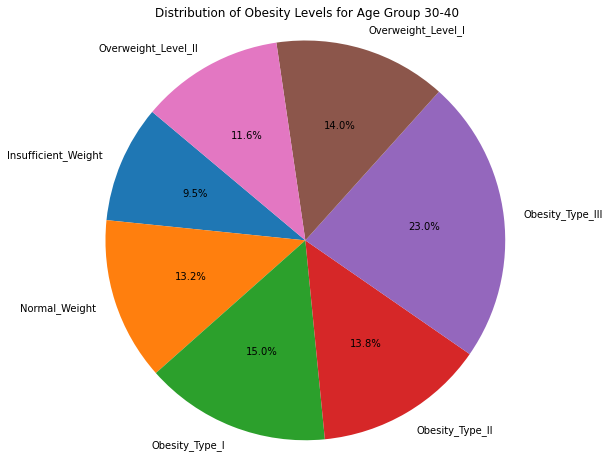

In [58]:
Age_group = '30-40'  # Example age group (you can choose any age group from your dataset)
obesity_counts = age_obesity_counts.loc[age_group].dropna()  # Corrected variable name
plt.figure(figsize=(8, 8))
plt.pie(obesity_counts, labels=obesity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Obesity Levels for Age Group {Age_group}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
#Is there a relationship between frequent consumption of high caloric food and obesity?
#I'm insterested in show and determine some of the potential factors of obesity levels 

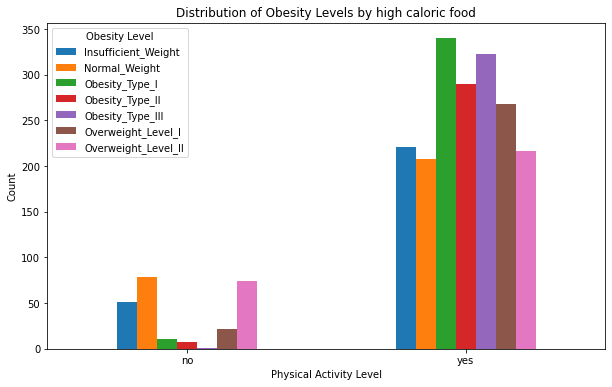

In [11]:
caloric_obesity_counts = df.groupby(['FAVC', 'NObeyesdad']).size().unstack()

# Show a grouped bar chart
caloric_obesity_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Obesity Levels by high caloric food')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level')
plt.show()

In [ ]:
# We can see above that people who answer with "Yes" are suffering of different obesity levels, what is really insteresting that there are large number of people suffering from insufficient weight even if they highly consumpt high caloric food which let me ask myself this question: Are they consumpt high caloric food to get normal weight?  

In [ ]:
# Is there a relationship between the time spent using technological devices and obesity levels?

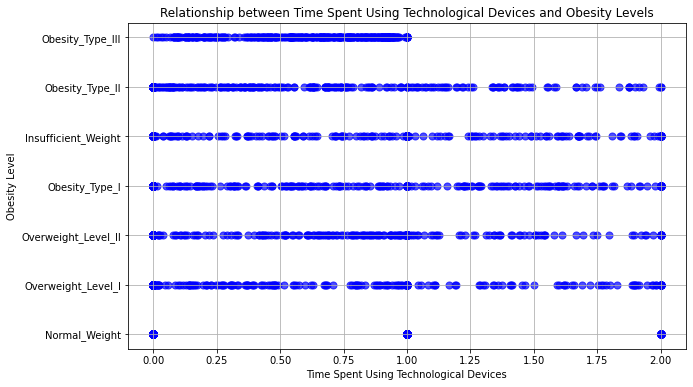

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TUE'], df['NObeyesdad'], alpha=0.7, c='blue', s=50)
plt.title('Relationship between Time Spent Using Technological Devices and Obesity Levels')
plt.xlabel('Time Spent Using Technological Devices')
plt.ylabel('Obesity Level')
plt.grid(True)
plt.show()

In [ ]:
#Worth mention that based on a quick research for "What does TUE column values could mean?" it appears that they provide a way to categorize individuals based on their level of engagement with technology devices 

In [19]:
#Is there a relationship between family history of overweight and obesity levels?

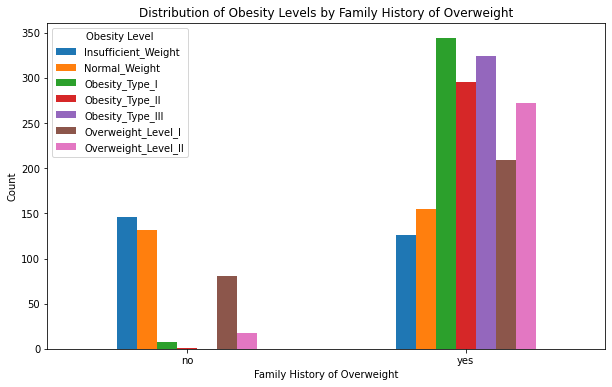

In [21]:
# Group the data by family history of overweight and obesity levels
family_obesity_counts = df.groupby(['family_history_with_overweight', 'NObeyesdad']).size().unstack()

# Plot a grouped bar chart
family_obesity_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Obesity Levels by Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Obesity Level')
plt.show()

In [ ]:
#It is very obvious that there is a relationship between Family History of Overweight and Obesity levels! Especially with obesity class 1 has got the hight value! 

In [ ]:
#Conclusion 

In [ ]:
# 1. Higher Rate in Families with a History of Overweight: Compared to families without such a history, families with a history of overweight often have a higher rate of obesity.  
# 2. Influence of Family Environment: The presence of family members who are overweight, it may be an indicator of common lifestyle choices or environmental factors—such as dietary habits, physical activity patterns, or even socioeconomic status—that cause obesity in the family. 
# 3.Awareness  Opportunities: By identifying the correlation between obesity levels and family histories of overweight will healthcare professionals provide targeted interventions that reduce the chance of obesity in high-risk families.
# 4. The Importance of Family-Based Interventions: Given the potential influence of family history on obesity risk, interventions aimed at the entire family may be more effective in promoting healthy lifestyle behaviors and preventing obesity than individual-focused approaches. Family-based interventions may include education, behavioral counseling, and support for adopting healthier habits together.
#5.Need for Additional Research: While this analysis provides useful insights, more research is needed to understand the complex interplay between genes, environmental factors, and the risk of obesity within families.
#6. Individuals who spend more time using technological (smart) devices may be more likely to suffer from obesity in the future, especially if they do not follow a healthy lifestyle. 
# 7.There is a strong correlation between time spent on technological devices and insufficient weight! which I recommend doing my health research to determine if there is a physiological or other factor leading to it. 
# 8 Obesity_Type_II is the dominant obesity level for people aged 20-30, whereas Obesity_Type_I is the dominant obesity level for people aged 30-40. What factors have changed? Is it true that people become more conscious of their health as they get older? 

In [ ]:
External Resources: 
https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data
Meaning of obesity levels: https://medlineplus.gov/ency/patientinstructions/000348.htm#:~:text=Overweight%20(not%20obese)%2C%20if,to%20or%20greater%20than%2040.0
https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
https://www.w3schools.com/python/pandas/ref_df_duplicated.asp
    